# Try to use Hugging Face pre-trained transformers

In [49]:
# Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from PIL import Image
import torch
from datasets import load_dataset

# Transformers
from transformers import ViTFeatureExtractor, ViTForImageClassification

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

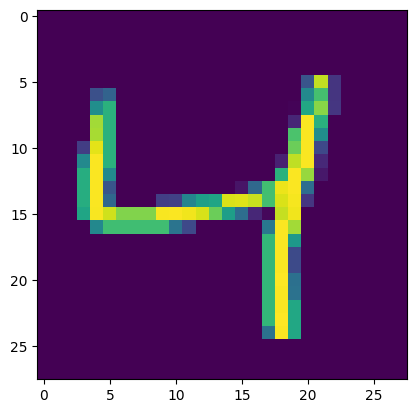

In [10]:
# Import and normalize MNist number image data
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_normalized = x_train/255
x_test_normalized = x_test/255
plt.imshow(x_train[2])


In [46]:
# Configure feature extractor without normalising (this has been done already)
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

In [52]:
# Download model from Hugging Face
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [75]:
# Try single example
dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]
image2 = np.stack((np.array(x_train[0]),)*3,-1)
inputs = feature_extractor(image2, return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

No config specified, defaulting to: cats-image/image
Found cached dataset cats-image (/home/rossclark/.cache/huggingface/datasets/huggingface___cats-image/image/1.9.0/68fbc793fb10cd165e490867f5d61fa366086ea40c73e549a020103dcb4f597e)


  0%|          | 0/1 [00:00<?, ?it/s]

Predicted class: corkscrew, bottle screw


In [74]:
stack = np.stack((np.array(x_train[0]),)*3,-1)
print(stack)
np.shape(stack)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


(28, 28, 3)